In [3]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

In [5]:
data_path = './MNIST'

data_test   = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
data_train  = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
print("the number of your training data (must be 10,000) = ", data_train.__len__())
print("hte number of your testing data (must be 60,000) = ", data_test.__len__())

the number of your training data (must be 10,000) =  10000
hte number of your testing data (must be 60,000) =  60000


In [10]:
data_loader = torch.utils.data.DataLoader(data_train, batch_size = 32, drop_last=True)

In [18]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256, bias=True)
        self.fc2 = nn.Linear(256, 256, bias=True)
        self.fc3 = nn.Linear(256, 10, bias=True)
        self.softmax = nn.Softmax()
        self.relu = nn.ReLU()
        # self.bnm1 = nn.BatchNorm1d(256, momentum=0.9)
        self.dropout = torch.nn.Dropout(p=0.2)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = self.fc1(x)
        # x = self.bnm1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        # x = self.bnm1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        return x

net = Net()

In [19]:
net

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [20]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-3)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [22]:
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [23]:
train_l = []
train_acc = []

test_l = []
test_acc = []

In [ ]:
net.train()
num_epochs = 100
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for X, Y in data_loader: 
        X = X.view(-1, 28*28).to(device) 
        Y = Y.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()

    with torch.no_grad(): 
        net.eval() 
        X_train = data_train.data.view(-1, 28*28).float().to(device) 
        Y_train = data_train.targets.to(device) 
        prediction = net(X_train)
        train_loss = criterion(prediction, Y_train) 
        predicted_classes = torch.argmax(prediction, 1) 
        correct_count = (predicted_classes == Y_train) 
        train_accuracy = correct_count.float().mean()
        train_l.append(train_loss.item()) 
        train_acc.append(train_accuracy.item())

        X_test = data_test.data.view(-1, 28*28).float().to(device) 
        Y_test = data_test.targets.to(device) 
        prediction = net(X_test)
        test_loss = criterion(prediction, Y_test) 
        predicted_classes = torch.argmax(prediction, 1) 
        correct_count = (predicted_classes == Y_test) 
        test_accuracy = correct_count.float().mean()

        test_l.append(test_loss.item()) 
        test_acc.append(test_accuracy.item())

    print("train acc: {} loss: {}".format(train_accuracy, train_loss))
    print("test acc: {} loss: {}".format(test_accuracy, test_loss))

print('Finished Training')

## Output

### 1. Plot the training and testing losses over epochs [2pt]

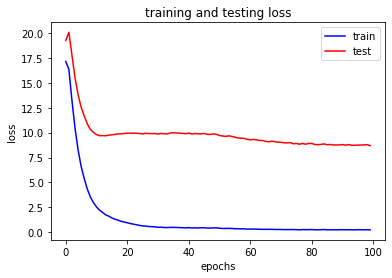

In [28]:
plt.plot([i for i in range(len(train_l))], train_l, c = 'blue', label = 'train')
plt.plot([i for i in range(len(test_l))], test_l, c = 'red', label ='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("training and testing loss")
plt.show()

### 2. Plot the training and testing accuracies over epochs [2pt]



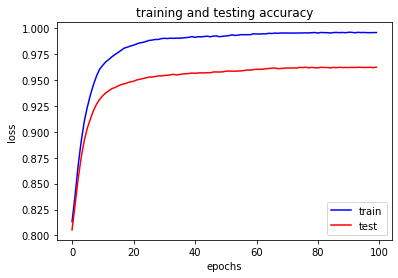

In [40]:
plt.plot([i for i in range(len(train_acc))], train_acc, c = 'blue', label = 'train')
plt.plot([i for i in range(len(test_acc))], test_acc, c = 'red', label ='test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("training and testing accuracy")
plt.show()

### 3. Print the final training and testing losses at convergence [2pt]

In [41]:
print("final training loss {}".format(train_l[-1]))
print("final testing loss {}".format(test_l[-1]))

final training loss 0.23605236411094666
final testing loss 8.690464973449707


### 4. Print the final training and testing accuracies at convergence [20pt]


In [42]:
print("final training accuracy {}".format(train_acc[-1]))
print("final testing accuracy {}".format(test_acc[-1]))

final training accuracy 0.9958999752998352
final testing accuracy 0.9624999856948854
